## 1. Import Packages

In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Import datasets

In [104]:
pneumonia_dataset = np.load('../Datasets/pneumoniamnist.npz')
print("Get object keys", pd.DataFrame(pneumonia_dataset).head())

Get object keys               0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


## 3. Get images and labels

In [105]:
train_images = pneumonia_dataset['train_images']
print("train_images dimensions", np.shape(train_images))
val_images = pneumonia_dataset['val_images']
print("val_images dimensions", np.shape(val_images))
test_images = pneumonia_dataset['test_images']
print("test_images dimensions", np.shape(test_images))
train_labels = pneumonia_dataset['train_labels']
print("train_labels dimensions", np.shape(train_labels))
val_labels = pneumonia_dataset['val_labels']
print("val_labels dimensions", np.shape(val_labels))
test_labels = pneumonia_dataset['test_labels']
print("test_labels dimensions", np.shape(test_labels))


train_images dimensions (4708, 28, 28)
val_images dimensions (524, 28, 28)
test_images dimensions (624, 28, 28)
train_labels dimensions (4708, 1)
val_labels dimensions (524, 1)
test_labels dimensions (624, 1)


## 4. Display a image from the dataset

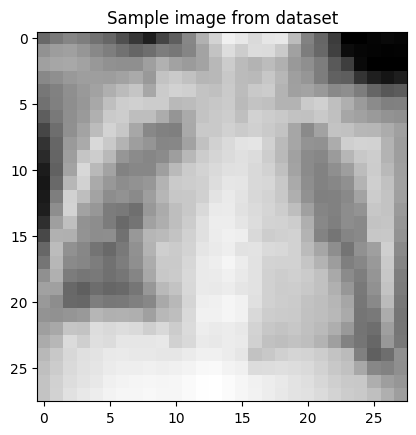

In [106]:
sample_image = train_images[0]
plt.imshow(sample_image, cmap="gray")
plt.title("Sample image from dataset")
plt.show()

## 5. Convert image data from integers to floating point numbers

In [107]:
train_images = train_images / 255.0
print("New dataset format using floating point numbers", train_images)
val_images = val_images / 255.0

test_images = test_images / 255.0

New dataset format using floating point numbers [[[0.36078431 0.42352941 0.45882353 ... 0.01960784 0.03137255 0.02352941]
  [0.50588235 0.54117647 0.55294118 ... 0.01568627 0.00784314 0.01176471]
  [0.55294118 0.57254902 0.58039216 ... 0.         0.         0.        ]
  ...
  [0.65882353 0.70588235 0.75294118 ... 0.46666667 0.45098039 0.49411765]
  [0.67843137 0.72156863 0.76470588 ... 0.6        0.54509804 0.51764706]
  [0.67843137 0.7254902  0.77647059 ... 0.65882353 0.60392157 0.54509804]]

 [[0.45098039 0.4627451  0.45882353 ... 0.48235294 0.45098039 0.40784314]
  [0.50980392 0.5372549  0.54901961 ... 0.57254902 0.52941176 0.4745098 ]
  [0.5254902  0.59215686 0.65490196 ... 0.59607843 0.54117647 0.48235294]
  ...
  [0.69019608 0.70588235 0.73333333 ... 0.6627451  0.59215686 0.55686275]
  [0.70980392 0.7254902  0.75294118 ... 0.67843137 0.63921569 0.61960784]
  [0.72156863 0.74117647 0.76470588 ... 0.71764706 0.69019608 0.6627451 ]]

 [[0.58431373 0.57254902 0.57647059 ... 0.501960

## 6. Create a neural network

In [108]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(8, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])

NN_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 16)                12560     
                                                                 
 dropout_24 (Dropout)        (None, 16)                0         
                                                                 
 dense_37 (Dense)            (None, 8)                 136       
                                                                 
 dropout_25 (Dropout)        (None, 8)                 0         
                                                                 
 dense_38 (Dense)            (None, 2)                 18        
                                                                 
Total params: 12714 (49.66 KB)
Trainable params: 1271

## 7. Compile model

In [109]:
NN_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(optimizer=NN_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 8. Train Model

In [110]:
history = NN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=50)

Epoch 1/50
95/95 [==============================] - 1s 5ms/step - loss: 0.5765 - accuracy: 0.7079 - val_loss: 0.5041 - val_accuracy: 0.7424
Epoch 2/50
95/95 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7349 - val_loss: 0.4681 - val_accuracy: 0.7424
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7436 - val_loss: 0.4391 - val_accuracy: 0.7462
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7619 - val_loss: 0.4077 - val_accuracy: 0.7576
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7676 - val_loss: 0.3939 - val_accuracy: 0.8073
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7770 - val_loss: 0.3742 - val_accuracy: 0.8206
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7855 - val_loss: 0.3717 - val_accuracy: 0.8435
Epoch 8/50
95/95 [==

## 9. Plot training and evaluation results

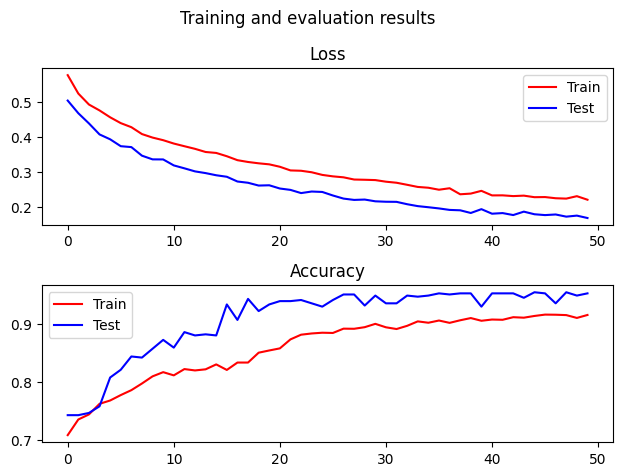

In [111]:
# Loss plot

figure, axis = plt.subplots(2)
line1, = axis[0].plot(history.history['loss'], 'r')
line2, = axis[0].plot(history.history['val_loss'], 'b')
axis[0].legend(['Train','Test'])
axis[0].set_title("Loss")
# Accuracy plot
line3, = axis[1].plot(history.history['accuracy'], 'r')
line4, = axis[1].plot(history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Test'])
axis[1].set_title("Accuracy")
figure.suptitle("Training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 10. Run model with test data and plot confusion matrix

20/20 [==============================] - 0s 2ms/step


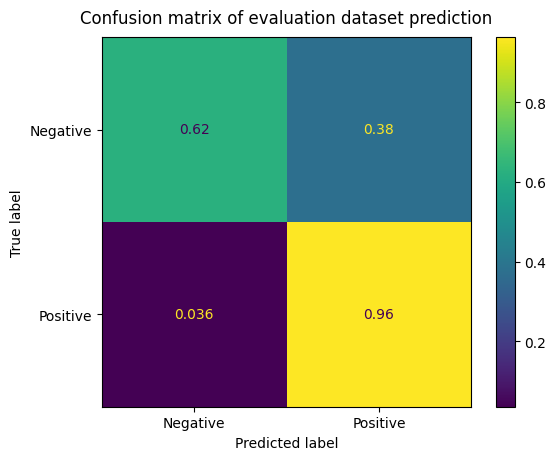

In [115]:
NN_test_prediction = NN_model.predict(test_images)

NN_test_prediction = np.argmax(NN_test_prediction, axis=1)

result = confusion_matrix(test_labels, NN_test_prediction , normalize='true')


cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of evaluation dataset prediction", pad=10)
plt.show()

## 11 Save model

In [113]:
NN_model.save("NN_model")

INFO:tensorflow:Assets written to: NN_model\assets


INFO:tensorflow:Assets written to: NN_model\assets
